In [1]:
!pip install keras -tuner # membantu mengoptimalkan parameter model machine learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.

In [2]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 655.3 kB/s eta 0:00:00


In [3]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception

#warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.9 MB/s eta 0:00:00


In [20]:
#dowload dataset
#"https://drive.google.com/file/d/1-ZVSJsZFD_kymf6vfhA5oYlx8fXeZ_dN/view?usp=drive_link"
!gdown 1JovTYoWOiEvUlhBRa5bdKRhuU9SnlQlv

Downloading...
From: https://drive.google.com/uc?id=1JovTYoWOiEvUlhBRa5bdKRhuU9SnlQlv
To: /content/Dataset.zip
100% 1.24G/1.24G [00:12<00:00, 95.6MB/s]


In [21]:
#unzip dataset
%%capture
!unzip Dataset.zip;

In [22]:
BATCH_SIZE = 16
EPOCHS = 10
IM_SIZE_W = 300
IM_SIZE_H = 400

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
for dirname, _, filenames in os.walk('/content/Dataset'):
    print(dirname)

/content/Dataset
/content/Dataset/Normal
/content/Dataset/Pneumonia-Viral
/content/Dataset/Pneumonia-Bacterial
/content/Dataset/COVID-19


In [25]:
filenames = tf.io.gfile.glob('/content/Dataset/*/*')
print(len(filenames))
filenames[:3]

4000


['/content/Dataset/Normal/Normal (708).jpg',
 '/content/Dataset/Normal/Normal (766).jpg',
 '/content/Dataset/Normal/Normal (505).jpg']

In [26]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

Normal                 1000
Pneumonia-Bacterial    1000
Pneumonia-Viral        1000
COVID-19               1000
Name: class, dtype: int64


,filename,class
0,/content/Dataset/Normal/Normal (708).jpg,Normal
1,/content/Dataset/Normal/Normal (766).jpg,Normal
2,/content/Dataset/Normal/Normal (505).jpg,Normal
3,/content/Dataset/Normal/Normal (613).jpg,Normal
4,/content/Dataset/Normal/Normal (992).jpg,Normal
...,...,...
3995,/content/Dataset/COVID-19/COVID-19 (570).jpg,COVID-19
3996,/content/Dataset/COVID-19/COVID-19 (53).jpg,COVID-19
3997,/content/Dataset/COVID-19/COVID-19 (769).jpg,COVID-19
3998,/content/Dataset/COVID-19/COVID-19 (277).jpg,COVID-19


In [27]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/Dataset/Normal/Normal (1).jpg,Normal
1,/content/Dataset/COVID-19/COVID-19 (385).jpg,COVID-19
2,/content/Dataset/Normal/Normal (451).jpg,Normal
3,/content/Dataset/COVID-19/COVID-19 (63).jpg,COVID-19
4,/content/Dataset/Pneumonia-Viral/Pneumonia-Vir...,Pneumonia-Viral
...,...,...
3995,/content/Dataset/Pneumonia-Bacterial/Pneumonia...,Pneumonia-Bacterial
3996,/content/Dataset/Pneumonia-Bacterial/Pneumonia...,Pneumonia-Bacterial
3997,/content/Dataset/Normal/Normal (124).jpg,Normal
3998,/content/Dataset/COVID-19/COVID-19 (337).jpg,COVID-19


In [28]:
change = {
'Normal' : '0',
'Pneumonia-Bacterial': '1',
'Pneumonia-Viral' : '2',
'COVID-19' : '3',
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/Dataset/Normal/Normal (1).jpg,0
1,/content/Dataset/COVID-19/COVID-19 (385).jpg,3
2,/content/Dataset/Normal/Normal (451).jpg,0
3,/content/Dataset/COVID-19/COVID-19 (63).jpg,3
4,/content/Dataset/Pneumonia-Viral/Pneumonia-Vir...,2
...,...,...
3995,/content/Dataset/Pneumonia-Bacterial/Pneumonia...,1
3996,/content/Dataset/Pneumonia-Bacterial/Pneumonia...,1
3997,/content/Dataset/Normal/Normal (124).jpg,0
3998,/content/Dataset/COVID-19/COVID-19 (337).jpg,3


In [29]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(4000, 2)
(4000, 2)


In [30]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(300, 400, 3)
(684, 936, 3)
(1224, 1552, 3)
(767, 1260, 3)
(864, 1416, 3)
(1178, 1754, 3)
(300, 400, 3)
(920, 1306, 3)
(575, 577, 3)
(719, 814, 3)
(482, 529, 3)
(300, 400, 3)
(1200, 1200, 3)
(300, 400, 3)
(300, 400, 3)
(1104, 1048, 3)
(1229, 1678, 3)
(632, 920, 3)
(300, 400, 3)
(474, 556, 3)


In [31]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))

3    800
2    800
0    800
1    800
Name: class, dtype: int64
0    200
1    200
3    200
2    200
Name: class, dtype: int64


In [40]:
datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = datagen.flow_from_dataframe(train_data,
                                        x_col="filename",
                                        y_col="class",
                                        target_size=(IM_SIZE_W, IM_SIZE_H),
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical',
                                        shuffle=True,
                                        num_parallel_calls=AUTOTUNE)

test_gen = test_datagen.flow_from_dataframe(test_data,
                                        x_col="filename",
                                        y_col="class",
                                        target_size=(IM_SIZE_W, IM_SIZE_H),
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical',
                                        shuffle=False,
                                        num_parallel_calls=AUTOTUNE)

Found 3200 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.


In [42]:
# Define CNN model
def create_model():
    with tf.device('/gpu:0'):

        # Model input
        input_layer = layers.Input(shape=(IM_SIZE_W, IM_SIZE_H, 1), name='input')

        # First block
        x = layers.Conv2D(filters=32, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_1')(input_layer)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_1')(x)

         # Second block
        x = layers.Conv2D(filters=64, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_2')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_2')(x)

        # Third block
        x = layers.Conv2D(filters=128, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_3')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_3')(x)

        # GlobalAveragePooling
        x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)
        x = layers.Flatten()(x)

        # Head
        x = layers.Dense(1024,activation='relu')(x)
        x = layers.Dropout(0.1, name='dropout_head_2')(x)
        x = layers.Dense(128,activation='relu')(x)

        # Output
        output = layers.Dense(units=4,
                              activation='softmax',
                              name='output')(x)


        model = Model(input_layer, output)
        f1_macro=tfa.metrics.f_scores.F1Score(num_classes=4,average="macro", name='f1_macro')
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=f1_macro)

    return model

model = create_model()
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 400, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 400, 32)      320       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 150, 200, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 200, 64)      18496     
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 75, 100, 64)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 100, 128)      73856     
                                                                 
 maxpool2d_3 (MaxPooling2D)  (None, 37, 50, 128)       0   

In [43]:
init_time = datetime.datetime.now()


train_steps = train_gen.samples // BATCH_SIZE
valid_steps = test_gen.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    batch_size=BATCH_SIZE,
    epochs=10,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/10
200/200 [==============================] - 55s 259ms/step - loss: 1.2892 - f1_macro: 0.3405 - val_loss: 1.1641 - val_f1_macro: 0.4543 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - 48s 238ms/step - loss: 1.0756 - f1_macro: 0.4520 - val_loss: 0.9821 - val_f1_macro: 0.4134 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - 48s 241ms/step - loss: 0.9617 - f1_macro: 0.5101 - val_loss: 0.9632 - val_f1_macro: 0.4832 - lr: 0.0010
Epoch 4/10
200/200 [==============================] - 49s 245ms/step - loss: 0.8063 - f1_macro: 0.6438 - val_loss: 0.8075 - val_f1_macro: 0.6398 - lr: 0.0010
Epoch 5/10
200/200 [==============================] - 48s 240ms/step - loss: 0.6644 - f1_macro: 0.6971 - val_loss: 0.6048 - val_f1_macro: 0.7055 - lr: 0.0010
Epoch 6/10
200/200 [==============================] - 48s 239ms/step - loss: 0.6274 - f1_macro: 0.7108 - val_loss: 0.6268 - val_f1_macro: 0.6897 - lr: 0.0010
Epoch 7/10
200/200 [==============================] 

Minimum Validation Loss: 0.5120


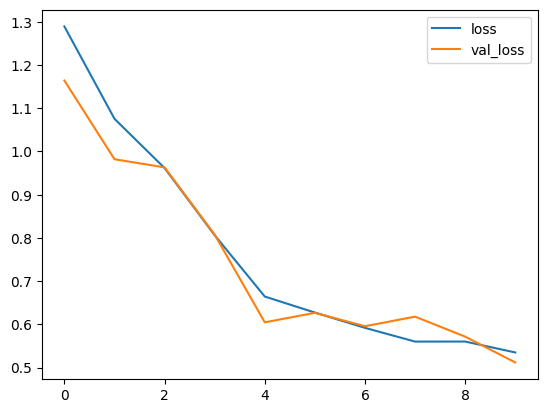

In [44]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [36]:
test_steps = test_gen.samples // BATCH_SIZE

test_loss, test_acc = model.evaluate(test_gen, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

50/50 [==============================] - 8s 161ms/step - loss: 0.5984 - accuracy: 0.7337

accuracy: 0.7337499856948853 loss:  0.5983790159225464


In [37]:
predict = model.predict(test_gen, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

50/50 [==============================] - 9s 181ms/step


array([0, 2, 0, 2, 0, 3, 1, 2, 2, 0, 3, 2, 3, 3, 1, 0, 0, 3, 2, 0])

In [38]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([0, 1, 0, 1, 0, 3, 2, 2, 1, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2, 0])

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       200
           1       0.63      0.56      0.59       200
           2       0.62      0.51      0.56       200
           3       0.94      0.91      0.92       200

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.72       800
weighted avg       0.73      0.73      0.72       800
 



<Axes: >

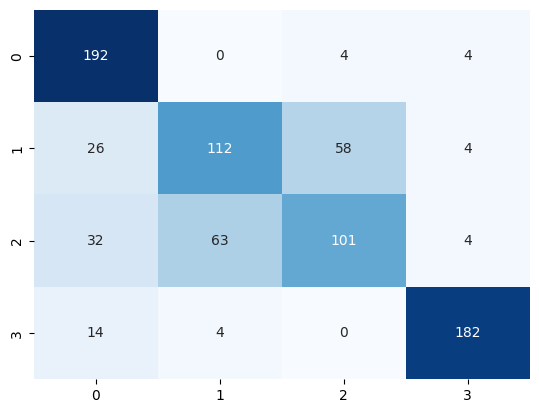

In [39]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume you have already trained your model and have test data
# model = ...

# Predictions on the test set
y_pred = model.predict(test_gen)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# True class labels
y_true_labels = test_gen.classes

# Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f'Accuracy: {accuracy}')

# Micro-average Recall
micro_recall = recall_score(y_true_labels, y_pred_labels, average='macro')
print(f'Macro-average Recall: {micro_recall}')

# Micro-average Precision
micro_precision = precision_score(y_true_labels, y_pred_labels, average='macro')
print(f'Macro-average Precision: {micro_precision}')

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels)
print('Classification Report:\n', class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)



50/50 [==============================] - 10s 190ms/step
Accuracy: 0.7675
Macro-average Recall: 0.7675
Macro-average Precision: 0.7664172996103314
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       200
           1       0.60      0.67      0.64       200
           2       0.64      0.54      0.58       200
           3       0.96      0.92      0.94       200

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.76       800

Confusion Matrix:
 [[189   3   3   5]
 [  8 134  57   1]
 [ 13  78 107   2]
 [  9   7   0 184]]
